In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import spearmanr
from scipy.stats import zscore 

from snmcseq_utils import plot_tsne_labels

In [4]:
input_f = './data/gene_level/genebody_mCH_human_combined_summary.tsv'
cluster_f = './data/cluster/test_clusters/MB_v1_MB_EA_MB_EB/test_backspin_0.05p.tsv' 

output_f = './data/cluster/cluster_MB_v1_MB_EA_MB_EB/genebody_mCH_clusters_v1_mc_c.tsv'

df_input = pd.read_table(input_f, index_col='id')
df_cluster = pd.read_table(cluster_f)

print(df_input.shape)
print(df_cluster.shape)
df_cluster.head()

(57240, 12870)
(6435, 2)


,cluster_ID,sample
0,cluster_1,170831_MB_EA_hs_58yr_BA10_pool_2460_AD006_indexed
1,cluster_1,170831_MB_EA_hs_58yr_BA10_pool_2459_AD010_indexed
2,cluster_1,160729_MB_v1_hs_25yr_MFG_pool_657_AD010_indexed
3,cluster_1,160729_MB_v1_hs_25yr_MFG_pool_420_AD008_indexed
4,cluster_1,170524_MB_EA_hs_58yr_BA10_pool_1974_AD002_indexed


In [32]:
# df_c = df_input.filter(regex='_c$')
# df_mc = df_input.filter(regex='_mc$')
# print(df_input.shape)
# # print(df_input.columns)
# print(df_c.shape)
# print(df_mc.shape)

df_mc_c = pd.DataFrame() 
for label, df_sub in df_cluster.groupby('cluster_ID'):
    samples = df_sub['sample'].values
    df_mc_c[label+'_mc'] = df_mc[samples+'_mc'].sum(axis=1)
    df_mc_c[label+'_c'] = df_c[samples+'_c'].sum(axis=1)
    
print(df_mc_c.shape)
df_mc_c.head()

(57240, 300)


,cluster_1_mc,cluster_1_c,cluster_10_mc,cluster_10_c,cluster_100_mc,cluster_100_c,cluster_101_mc,cluster_101_c,cluster_102_mc,cluster_102_c,...,cluster_95_mc,cluster_95_c,cluster_96_mc,cluster_96_c,cluster_97_mc,cluster_97_c,cluster_98_mc,cluster_98_c,cluster_99_mc,cluster_99_c
id,,,,,,,,,,,,,,,,,,,,,
ENSG00000000003.10,232,4705,64,2330,63,1317,122,3775,10,502,...,75,1451,48,1067,298,7594,42,849,148,3390
ENSG00000000005.5,559,6153,173,3336,166,2336,287,5449,20,625,...,127,1928,110,1889,683,11702,104,1484,260,4071
ENSG00000000419.8,235,19737,90,11505,67,8166,136,15401,13,2035,...,82,6453,55,5603,288,29939,63,6426,179,13594
ENSG00000000457.9,1639,35633,318,19939,366,14804,539,32372,51,4115,...,223,14569,100,8886,879,62387,202,9152,465,24610
ENSG00000000460.12,6730,138542,2496,78875,4204,56479,5892,116571,561,17372,...,3636,49805,2307,37361,13768,236202,3486,37479,7297,104083


In [4]:
cov = (df_mc_c.filter(regex='_c$').apply(np.log10)>3)*1
gene_cov = cov.apply(np.all, axis=1)
df_filtered = df_mc_c.loc[gene_cov, :]
print(df_filtered.shape)

df_mc = df_filtered.filter(regex='_mc$')
df_c = df_filtered.filter(regex='_c$')
df_mc.columns = [col[:-len('_mc')] for col in df_mc.columns]
df_c.columns = [col[:-len('_c')] for col in df_c.columns]
df_mcc = df_mc/df_c
df_mcc.columns = [col+'_mcc' for col in df_mcc.columns]
print(df_mcc.shape)

(18045, 300)
(18045, 150)


In [5]:
input_f = './data/cluster/cluster_MB_v1/genebody_mCH_human_combined_cluster_MB_v1_mcc.tsv'
# input_f2 = './data/cluster/cluster_MB_v1_MB_EA_MB_EB/genebody_mCH_clusters_v1_mcc.tsv'

input_tsne = './data/tsne/tsne_perp30_binc_mCH_human_combined_100000_summary_nmcc_v3.tsv'
input_meta = './data/metadata/metadata_human_combined_updated.tsv'
# input_cluster = './data/cluster/cluster_MB_v1_MB_EA_MB_EB/clusters_v1_binc_mCH_louvain.tsv'

output_f2 = './data/cluster/cluster_MB_v1_MB_EA_MB_EB/clusters_v1_binc_mCH_louvain_annotation.tsv'

input_gt = './data/cluster/cluster_MB_v1/cluster_MB_v1.tsv'

df = pd.read_table(input_f, index_col='id')
df2 = df_mcc 
df_meta = pd.read_table(input_meta, index_col='Sample')
# df_cluster = pd.read_table(input_cluster)
df_tsne = pd.read_table(input_tsne)
df_gt = pd.read_table(input_gt, index_col='sample')['cell_type'].to_frame()
print(df.shape)
print(df2.shape)

(30152, 21)
(18045, 150)


In [6]:
df_cmb = pd.merge(df, df2, left_index=True, right_index=True)
print(df_cmb.shape)

(18045, 171)


In [7]:
def reorder_cols(cols):
    cols_ordered = sorted([int(col.split('_')[1]) for col in cols])
    cols_ordered = ['cluster_'+str(col)+'_mcc' for col in cols_ordered]
    return cols_ordered

celltype_cols = df.filter(regex='_mcc$').columns.values 
cluster_cols = reorder_cols(df2.filter(regex='_mcc$').columns.values) 
celltypes = [col[:-len('_mcc')] for col in celltype_cols]
clusters = [col[:-len('_mcc')] for col in cluster_cols]


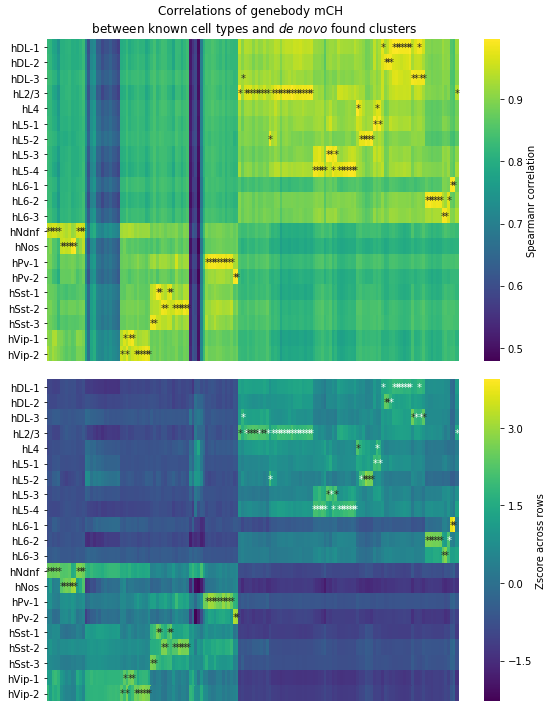

In [12]:
# do spearman correlation cell_type * clusters

rho, pval = spearmanr(df_cmb[celltype_cols], df_cmb[cluster_cols])
corr = rho[:len(celltype_cols), len(celltype_cols):]
df_corr = pd.DataFrame(corr, columns=clusters, index=celltypes)
df_corr_zscore = df_corr.apply(zscore, axis=0)

df_annot = pd.DataFrame(columns=df_corr.columns, index=df_corr.index)
celltype_res = []
for col, idx in df_corr.idxmax().iteritems():
    if df_corr.loc[idx, col] > 0.9:
        # print(col + ' --> ' + idx)
        celltype_res.append({'cluster_ID': col,
                             'cluster_annotation': idx})
        df_annot.loc[idx, col] = '*'
    else:
        # print(col + ' cell type not matched!')
        celltype_res.append({'cluster_ID': col,
                             'cluster_annotation': np.nan})
        
celltype_res = pd.DataFrame(celltype_res)
df_annot = df_annot.fillna('')
    
fig, axs = plt.subplots(2, 1, figsize=(8, 10))
ax = axs[0]
sns.heatmap(df_corr, 
        ax=ax,
        cmap='viridis',
        annot = df_annot, fmt='',
        # linewidth = 0.01,
        xticklabels = False,
        cbar_kws={'label':'Spearmanr correlation'})
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
ax.set_title('Correlations of genebody mCH \n between known cell types and $de$ $novo$ found clusters')

ax = axs[1]
sns.heatmap(df_corr_zscore, 
        ax=ax,
        cmap='viridis',
        annot = df_annot, fmt='',
        # linewidth = 0.01,
        xticklabels = False,
        cbar_kws={'label':'Zscore across rows'})
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
# ax.set_title('')
fig.tight_layout()
plt.show()




In [26]:
df_cluster2 = df_cluster.set_index('sample')
df_annot2 = celltype_res.set_index('cluster_ID')
df_annot2.head()

df_celltype2 = pd.merge(df_cluster2, df_annot2, left_on='cluster_ID', right_index=True).sort_index()
df_celltype2.head()

,cluster_ID,cluster_annotation
sample,,
160729_MB_v1_hs_25yr_MFG_pool_1000_AD008_indexed,cluster_52,hSst-2
160729_MB_v1_hs_25yr_MFG_pool_1000_AD010_indexed,cluster_63,hPv-1
160729_MB_v1_hs_25yr_MFG_pool_1001_AD008_indexed,cluster_61,hPv-1
160729_MB_v1_hs_25yr_MFG_pool_1001_AD010_indexed,cluster_71,hL2/3
160729_MB_v1_hs_25yr_MFG_pool_1002_AD010_indexed,cluster_146,hL6-3


(6435, 5)


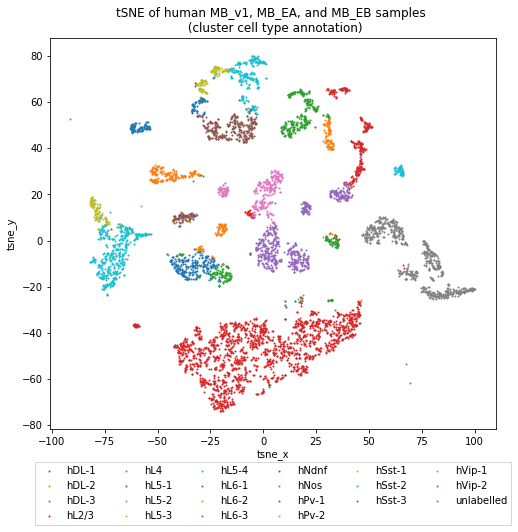

In [21]:
# tSNE plot as confirmation

# new result
df_celltype = pd.merge(df_cluster, celltype_res, left_on='cluster_ID', right_on='cluster_ID')
df_plot = pd.merge(df_tsne, df_celltype, left_on='sample', right_on='sample')
print(df_plot.shape)

plot_tsne_labels(df_plot, tc='cluster_annotation', 
    title='tSNE of human MB_v1, MB_EA, and MB_EB samples \n (cluster cell type annotation)', 
    figsize=(8,8), legend_mode=1,
#     output=''
    )

